dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


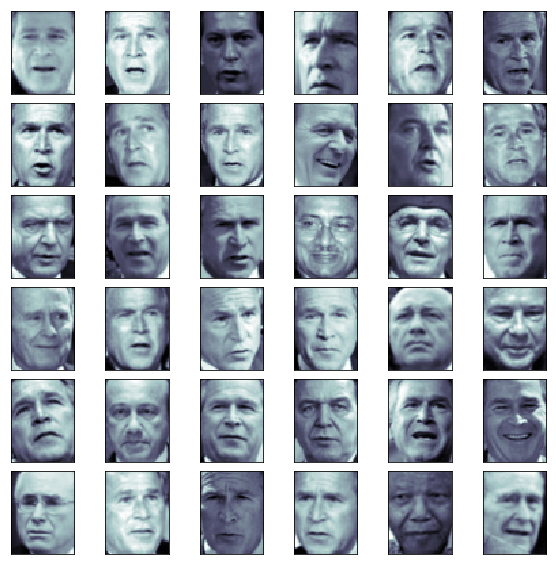

(957, 2914)


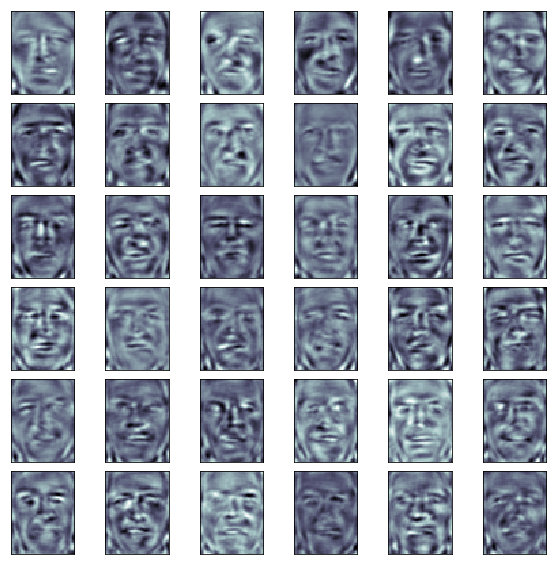

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
#faces = fetch_lfw_people(min_faces_per_person=60)#只取出那些拥有60张以上样本的人

print(faces.keys())#data中有13233个人脸数据，每个2914维，62*47，放在image中

#随机取36张脸
random_indexes = np.random.permutation(len(faces.data))
x = faces.data[random_indexes]
examples_faces = x[:36]

#绘制函数
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),#图中绘制子图
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(examples_faces)

#特征脸
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized')
pca.fit(x)
print(pca.components_.shape)

plot_faces(pca.components_[50:86])#把PCA当做样本来看,输出结果越靠前越笼统